<a href="https://colab.research.google.com/github/ZiqiLi379/STATS-302-Intro-to-ML/blob/main/STATS302_Week_2_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 2 - Boston Dataset
###STATS 302 Principle of Machine Learning
###Duke Kunshan University

In [2]:
import pandas as pd
import numpy as np

# from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns  # data visualization library

import statsmodels.formula.api as smf  # A convenience interface for specifying models

# from google.colab import files
# import io

load_boston is deprecated in 1.0 and will be removed in 1.2.

More detail:
https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html

Load the dataset by yourself:
https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [ ]:
# # loading the dataset
# uploaded = files.upload()
# data = pd.read_csv(io.BytesIO(uploaded['boston.csv']))
# data = data.drop(data.columns[0], axis=1)
# print(data.shape)
# data.head()

# boston = load_boston()
# print("type of boston = ", type(boston))
# print(boston.keys())
# print(boston.feature_names)
# print(boston.data.shape)
# print(boston.DESCR)

In [3]:
data = pd.read_csv(r"D:\Files\Year 4\S3\STATS 302\Codes\STATS-302-Intro-to-ML\Week_2_Data\boston.csv")

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: xlabel='LSTAT', ylabel='MEDV'>

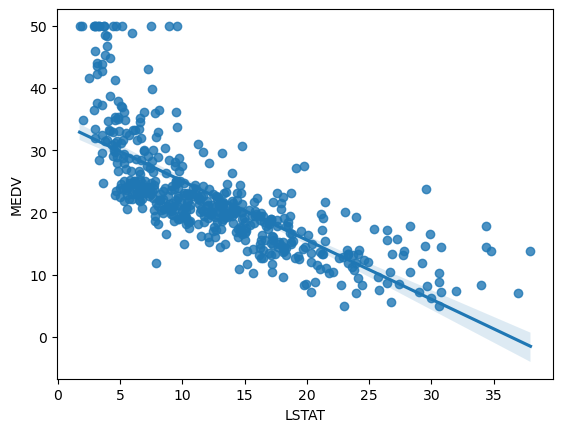

In [5]:
sns.regplot(x = data['LSTAT'], y = data['MEDV'])

In [7]:
# est = smf.ols(y ~ x,data)

# The basic syntax of ols is smf.ols(formula, data)

est = smf.ols('MEDV ~ LSTAT',data = data).fit() #ols is ordinary least squares # have different output than LinearRegression() for some properties

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           5.08e-88
Time:                        16:13:36   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

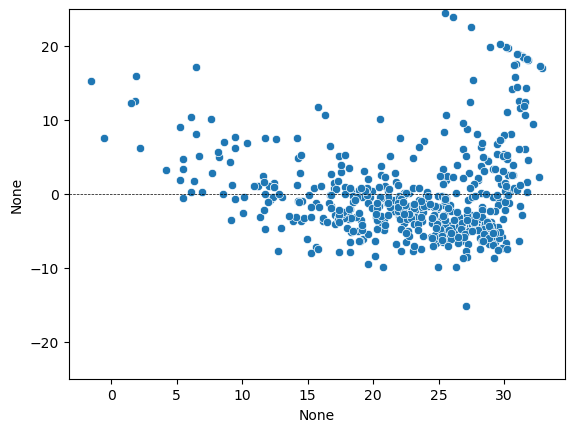

In [9]:
#dist of residuals
plt.ylim(-25,25)
sns.scatterplot(x = est.fittedvalues, y = est.resid)  # plotting the error together with the x-value
plt.axhline(y = 0,linewidth = 0.5,linestyle = 'dashed',color = 'black')

# Multiple Regression

In [11]:
string_cols = ' + '.join(data.columns[:-1])
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 Feb 2026   Prob (F-statistic):          6.72e-135
Time:                        16:22:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [13]:
string_cols # join all the column names using '+' except the last column

'CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [14]:
#removing AGE and INDUS
string_cols = ' + '.join(data.columns[:-1].difference(['AGE','INDUS']))  # removes the columns 'AGE' and 'INDUS' from that list
est = smf.ols('MEDV ~ {}'.format(string_cols),data = data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 09 Feb 2026   Prob (F-statistic):          5.54e-137
Time:                        23:02:59   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

# Interaction term

An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. A significant interaction term means a better fit to the data, and better predictions from the regression equation.

In [17]:
est = smf.ols('MEDV ~ LSTAT*AGE',data = data).fit()  # LSTAT * AGE  ≡  LSTAT + AGE + LSTAT:AGE
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           4.86e-88
Time:                        23:06:36   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [16]:
#adding power term
tmp = data.copy()
tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ LSTAT + LSTAT_2',data = tmp).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 09 Feb 2026   Prob (F-statistic):          1.56e-112
Time:                        23:05:41   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.8620      0.872     49.149      0.0

In [19]:
#adding power term
# tmp = data.copy()
# tmp['LSTAT_2'] = tmp['LSTAT']**2
est = smf.ols('MEDV ~ np.power(LSTAT,5)',data = data).fit()  # MEDV = Intercept + LSTAT^5
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     73.35
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           1.32e-16
Time:                        23:09:31   Log-Likelihood:                -1805.9
No. Observations:                 506   AIC:                             3616.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.6291      0